In [17]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

## Predicting Delay Times on scheduled flights using airlines data

Question: Can we predict the delay times of scheduled flights for Delta Airlines, Southwest Airlines, and United Airlines?

Problem: We chose to research this question because flight delays are one of the worst feelings when you have to wait extra time at the airport. Flight delays also can cause financial losses, loss of reputation for the companies, and bad business relations for future business transactions for the airline companies. 

Which ML model is the best for predicting delay times?
    - Considering XG boost
    - Nueral Networks for an LSTM



In [8]:
southwest = pd.read_csv("/Users/rachitgoli/FlightPredictions/southwest.csv",encoding='unicode_escape', header=0)
southwest

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644,N8578Q,ATL,5:55,6:02,115,97,7,6:13,11,0,0,0,0,0
1,WN,1/1/22,3245,NaN,MDW,16:35,0:00,135,0,0,0:00,0,0,0,0,0,0
2,WN,1/1/22,3438,N903WN,ATL,12:50,12:46,110,98,-4,12:59,13,0,0,0,0,0
3,WN,1/2/22,121,N494WN,MDW,18:45,21:14,135,175,149,21:25,11,17,0,40,0,132
4,WN,1/2/22,565,N8818Q,ATL,16:55,17:52,110,108,57,18:01,9,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,WN,12/30/22,3394,N203WN,MDW,12:35,13:05,130,107,30,13:15,10,0,0,0,0,0
1460,WN,12/30/22,3813,N8639B,MDW,20:35,20:25,130,106,-10,20:34,9,0,0,0,0,0
1461,WN,12/31/22,901,N8573Z,MDW,12:45,14:14,125,110,89,14:25,11,0,0,0,0,74
1462,WN,12/31/22,986,N8719Q,ATL,17:55,18:15,110,102,20,18:31,16,0,0,0,0,0


In [9]:
delta_updated = pd.read_csv("/Users/rachitgoli/FlightPredictions/delta_updated.csv",encoding='unicode_escape', header=0)
delta_updated

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/22,1675,N3750D,ATL,16:50,17:32,110,96,42,17:43,11,28,0,0,0,0
1,DL,1/1/22,2351,N828DN,ATL,13:00,13:00,108,104,0,13:21,21,0,0,0,0,0
2,DL,1/1/22,2532,N890DN,ATL,7:00,7:46,119,93,46,7:58,12,20,0,0,0,0
3,DL,1/1/22,2798,N883DN,ATL,10:00,9:52,100,95,-8,10:06,14,0,0,0,0,0
4,DL,1/2/22,1480,N3748Y,ATL,5:44,6:04,111,119,20,6:30,26,20,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,DL,12/30/22,2007,N390DA,ATL,19:30,19:22,116,100,-8,19:39,17,0,0,0,0,0
2380,DL,12/31/22,1266,N699DL,ATL,16:40,16:51,112,101,11,17:02,11,0,0,0,0,0
2381,DL,12/31/22,1406,N685DA,ATL,6:00,6:14,113,100,14,6:29,15,0,0,0,0,0
2382,DL,12/31/22,1469,N3749D,ATL,7:05,7:03,120,110,-2,7:20,17,0,0,0,0,0


In [10]:
united = pd.read_csv("/Users/rachitgoli/FlightPredictions/united.csv",encoding='unicode_escape', header=0)
united

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/22,1643.0,N875UA,DEN,8:00,8:02,261.0,334.0,2.0,8:12,10.0,0.0,0.0,75.0,0.0,0.0
1,UA,1/1/22,1979.0,N892UA,DEN,15:50,16:30,260.0,266.0,40.0,16:41,11.0,15.0,0.0,6.0,0.0,25.0
2,UA,1/1/22,2234.0,N37287,ORD,6:45,6:36,139.0,149.0,-9.0,6:53,17.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/2/22,1643.0,N848UA,DEN,8:00,9:00,261.0,260.0,60.0,9:17,17.0,0.0,59.0,0.0,0.0,0.0
4,UA,1/2/22,1979.0,N836UA,DEN,15:50,16:42,260.0,251.0,52.0,16:52,10.0,36.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
838,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
839,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0
840,UA,12/31/22,1643.0,N817UA,DEN,8:00,7:56,262.0,248.0,-4.0,8:14,18.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#cleaning data drop Nan
southwest = southwest.dropna()
delta_updated = delta_updated.dropna()
united = united.dropna()

southwest


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644,N8578Q,ATL,5:55,6:02,115,97,7,6:13,11,0,0,0,0,0
2,WN,1/1/22,3438,N903WN,ATL,12:50,12:46,110,98,-4,12:59,13,0,0,0,0,0
3,WN,1/2/22,121,N494WN,MDW,18:45,21:14,135,175,149,21:25,11,17,0,40,0,132
4,WN,1/2/22,565,N8818Q,ATL,16:55,17:52,110,108,57,18:01,9,0,0,0,0,55
5,WN,1/2/22,988,N7838A,DEN,12:35,12:44,240,304,9,12:52,8,9,0,64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,WN,12/30/22,3394,N203WN,MDW,12:35,13:05,130,107,30,13:15,10,0,0,0,0,0
1460,WN,12/30/22,3813,N8639B,MDW,20:35,20:25,130,106,-10,20:34,9,0,0,0,0,0
1461,WN,12/31/22,901,N8573Z,MDW,12:45,14:14,125,110,89,14:25,11,0,0,0,0,74
1462,WN,12/31/22,986,N8719Q,ATL,17:55,18:15,110,102,20,18:31,16,0,0,0,0,0


In [12]:
delta_updated


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/22,1675,N3750D,ATL,16:50,17:32,110,96,42,17:43,11,28,0,0,0,0
1,DL,1/1/22,2351,N828DN,ATL,13:00,13:00,108,104,0,13:21,21,0,0,0,0,0
2,DL,1/1/22,2532,N890DN,ATL,7:00,7:46,119,93,46,7:58,12,20,0,0,0,0
3,DL,1/1/22,2798,N883DN,ATL,10:00,9:52,100,95,-8,10:06,14,0,0,0,0,0
4,DL,1/2/22,1480,N3748Y,ATL,5:44,6:04,111,119,20,6:30,26,20,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,DL,12/30/22,2007,N390DA,ATL,19:30,19:22,116,100,-8,19:39,17,0,0,0,0,0
2380,DL,12/31/22,1266,N699DL,ATL,16:40,16:51,112,101,11,17:02,11,0,0,0,0,0
2381,DL,12/31/22,1406,N685DA,ATL,6:00,6:14,113,100,14,6:29,15,0,0,0,0,0
2382,DL,12/31/22,1469,N3749D,ATL,7:05,7:03,120,110,-2,7:20,17,0,0,0,0,0


In [13]:
united

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/22,1643.0,N875UA,DEN,8:00,8:02,261.0,334.0,2.0,8:12,10.0,0.0,0.0,75.0,0.0,0.0
1,UA,1/1/22,1979.0,N892UA,DEN,15:50,16:30,260.0,266.0,40.0,16:41,11.0,15.0,0.0,6.0,0.0,25.0
2,UA,1/1/22,2234.0,N37287,ORD,6:45,6:36,139.0,149.0,-9.0,6:53,17.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/2/22,1643.0,N848UA,DEN,8:00,9:00,261.0,260.0,60.0,9:17,17.0,0.0,59.0,0.0,0.0,0.0
4,UA,1/2/22,1979.0,N836UA,DEN,15:50,16:42,260.0,251.0,52.0,16:52,10.0,36.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0
837,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
838,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
839,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0


In [14]:
df_appended = pd.concat([southwest, delta_updated, united], ignore_index=True)
df_appended

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644.0,N8578Q,ATL,5:55,6:02,115.0,97.0,7.0,6:13,11.0,0.0,0.0,0.0,0.0,0.0
1,WN,1/1/22,3438.0,N903WN,ATL,12:50,12:46,110.0,98.0,-4.0,12:59,13.0,0.0,0.0,0.0,0.0,0.0
2,WN,1/2/22,121.0,N494WN,MDW,18:45,21:14,135.0,175.0,149.0,21:25,11.0,17.0,0.0,40.0,0.0,132.0
3,WN,1/2/22,565.0,N8818Q,ATL,16:55,17:52,110.0,108.0,57.0,18:01,9.0,0.0,0.0,0.0,0.0,55.0
4,WN,1/2/22,988.0,N7838A,DEN,12:35,12:44,240.0,304.0,9.0,12:52,8.0,9.0,0.0,64.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0
4660,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
4661,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
4662,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0


In [15]:
# Any missing Values
total = df_appended.isnull().sum().sort_values(ascending=False)
print(total)

Carrier Code                                0
Departure delay (Minutes)                   0
Delay Security (Minutes)                    0
Delay National Aviation System (Minutes)    0
Delay Weather (Minutes)                     0
Delay Carrier (Minutes)                     0
Taxi-Out time (Minutes)                     0
Wheels-off time                             0
Actual elapsed time (Minutes)               0
Date (MM/DD/YYYY)                           0
Scheduled elapsed time (Minutes)            0
Actual departure time                       0
Scheduled departure time                    0
Destination Airport                         0
Tail Number                                 0
Flight Number                               0
Delay Late Aircraft Arrival (Minutes)       0
dtype: int64


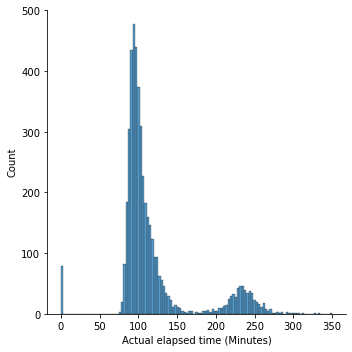

In [20]:
# Univariate Analysis
sns.displot(df_appended['Actual elapsed time (Minutes)'])


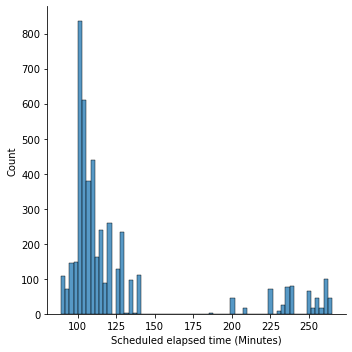

In [18]:
# Univariate Analysis
sns.displot(df_appended['Scheduled elapsed time (Minutes)'])

In [19]:
dataframe_new_columns = df_appended
dataframe_new_columns["Difference Between Actual and Elapsed Travel Time (Minutes)"] = (
    dataframe_new_columns["Actual elapsed time (Minutes)"] - dataframe_new_columns["Scheduled elapsed time (Minutes)"]
)
# dataframe_new_columns.drop(["Difference Between Actual and Elapsed Travel Time"], axis=1)
dataframe_new_columns

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Difference Between Actual and Elapsed Travel Time (Minutes)
0,WN,1/1/22,2644.0,N8578Q,ATL,5:55,6:02,115.0,97.0,7.0,6:13,11.0,0.0,0.0,0.0,0.0,0.0,-18.0
1,WN,1/1/22,3438.0,N903WN,ATL,12:50,12:46,110.0,98.0,-4.0,12:59,13.0,0.0,0.0,0.0,0.0,0.0,-12.0
2,WN,1/2/22,121.0,N494WN,MDW,18:45,21:14,135.0,175.0,149.0,21:25,11.0,17.0,0.0,40.0,0.0,132.0,40.0
3,WN,1/2/22,565.0,N8818Q,ATL,16:55,17:52,110.0,108.0,57.0,18:01,9.0,0.0,0.0,0.0,0.0,55.0,-2.0
4,WN,1/2/22,988.0,N7838A,DEN,12:35,12:44,240.0,304.0,9.0,12:52,8.0,9.0,0.0,64.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0,-30.0
4660,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0,-4.0
4661,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0,-21.0
4662,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0,-19.0


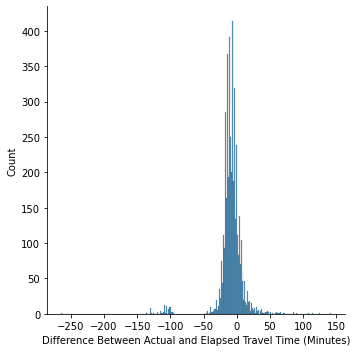

In [29]:
sns.displot(dataframe_new_columns['Difference Between Actual and Elapsed Travel Time (Minutes)'])
#Normal distribution

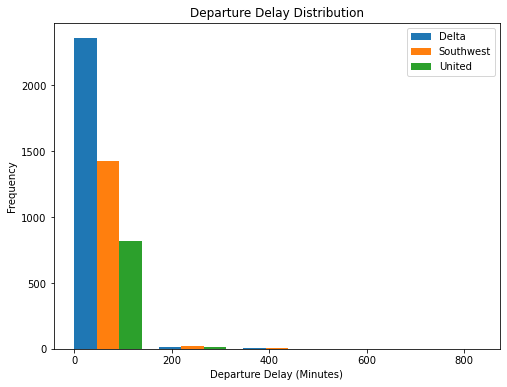

In [44]:

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the histogram
plt.hist([delta_updated['Departure delay (Minutes)'], southwest['Departure delay (Minutes)'], united['Departure delay (Minutes)']], 
         bins=5, 
         label=['Delta', 'Southwest', 'United'])

# Adding labels and title
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Departure Delay Distribution')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [45]:
dataframe_new_columns.columns
dataframe_just_numbers_that_can_be_correlated = dataframe_new_columns.drop(columns=['Carrier Code', 'Date (MM/DD/YYYY)',  'Destination Airport','Flight Number', 'Tail Number','Scheduled departure time', 'Actual departure time','Wheels-off time' ])
dataframe_just_numbers_that_can_be_correlated.corr()

,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Difference Between Actual and Elapsed Travel Time (Minutes)
Scheduled elapsed time (Minutes),1.000000,0.930870,0.016941,0.059272,0.013633,0.040996,0.041204,-0.009205,-0.009414,0.005461
Actual elapsed time (Minutes),0.930870,1.000000,0.031705,0.247926,0.024589,0.052958,0.178963,-0.006032,0.012169,0.370428
Departure delay (Minutes),0.016941,0.031705,1.000000,0.038569,0.780571,0.128915,0.176085,0.023358,0.598658,0.043708
Taxi-Out time (Minutes),0.059272,0.247926,0.038569,1.000000,0.044411,0.084840,0.377801,0.025029,0.006148,0.527896
Delay Carrier (Minutes),0.013633,0.024589,0.780571,0.044411,1.000000,-0.007580,0.027547,-0.003366,0.052712,0.032642
Delay Weather (Minutes),0.040996,0.052958,0.128915,0.084840,-0.007580,1.000000,0.047765,-0.001131,-0.001336,0.040720
Delay National Aviation System (Minutes),0.041204,0.178963,0.176085,0.377801,0.027547,0.047765,1.000000,-0.001719,0.067148,0.385076
Delay Security (Minutes),-0.009205,-0.006032,0.023358,0.025029,-0.003366,-0.001131,-0.001719,1.000000,0.014142,0.006892
Delay Late Aircraft Arrival (Minutes),-0.009414,0.012169,0.598658,0.006148,0.052712,-0.001336,0.067148,0.014142,1.000000,0.057240
Difference Between Actual and Elapsed Travel Time (Minutes),0.005461,0.370428,0.043708,0.527896,0.032642,0.040720,0.385076,0.006892,0.057240,1.000000


 As shown above, the most powerful correlations are the following:
 1. Scheduled elapsed time (minutes) and Actual elapsed time
 2. Departure Delay (Minutes) and Delay Carrier (Minutes)
 3. Departure Delay (Minutes) and Delay Late Aircraft Arrival (Minutes)
 4. Delay National Aviation System (Minutes) and Differece Between Actual and Elapsed Time (Minutes)
 5. Taxi-Out time (Minutes) and Difference Between Actual and Elapsed Time (Minutes)

In [73]:
# MODEL BUILDING 

In [75]:
X = dataframe_just_numbers_that_can_be_correlated.drop('Departure delay (Minutes)', axis=1)
y = dataframe_just_numbers_that_can_be_correlated['Departure delay (Minutes)']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Scheduled elapsed time (Minutes)                             4664 non-null   float64
 1   Actual elapsed time (Minutes)                                4664 non-null   float64
 2   Taxi-Out time (Minutes)                                      4664 non-null   float64
 3   Delay Carrier (Minutes)                                      4664 non-null   float64
 4   Delay Weather (Minutes)                                      4664 non-null   float64
 5   Delay National Aviation System (Minutes)                     4664 non-null   float64
 6   Delay Security (Minutes)                                     4664 non-null   float64
 7   Delay Late Aircraft Arrival (Minutes)                        4664 non-null   fl

In [76]:
y

0         7.0
1        -4.0
2       149.0
3        57.0
4         9.0
        ...  
4659      0.0
4660     -1.0
4661     10.0
4662     54.0
4663     -4.0
Name: Departure delay (Minutes), Length: 4664, dtype: float64

In [77]:
# Create training and test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=22)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,random_state=48)

In [78]:
kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)

In [79]:
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [80]:
#this is the regressor model we will use!
reg=DecisionTreeRegressor(random_state=30)

#setting up search for the best decisiontreeregressor estimator based on r-squared across all different folds
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

#executing the search
model = search.fit(X_train, y_train)

In [81]:
best= model.best_estimator_
print(best) 
#the best depth is 10

DecisionTreeRegressor(max_depth=14, random_state=30)


In [82]:
#scores based on depth

#Scores: 

#Have negative mean squared error so need to take absolute value and square root to convert to root mean squared error
mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))

#nothing needs to be done for r2, it is the same
r2= model.cv_results_['mean_test_r2']

#Have negative mean absolute error so need to take absolute value
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

#Get standard deviations as well...
SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model)

    depth       rmse        r2        mae      rmseSD      r2SD     maeSD
0       1  31.669254  0.235825  14.627270  356.814182  0.136020  1.375502
1       2  21.511606  0.620542  11.253134  130.579813  0.145271  0.991990
2       3  16.365043  0.778469   8.465542   80.660560  0.092479  0.852589
3       4  13.827709  0.841439   7.314411   57.170416  0.068508  0.511379
4       5  12.202377  0.880625   6.579537   55.617913  0.045671  0.496711
5       6  10.957558  0.905469   6.088098   41.485679  0.029909  0.451320
6       7  10.902139  0.908049   5.903302   54.749567  0.034665  0.500438
7       8  10.623250  0.913135   5.762848   49.247400  0.031279  0.480116
8       9  10.204572  0.917916   5.622260   35.331184  0.028475  0.441132
9      10  10.522977  0.915400   5.585382   60.356627  0.034575  0.478957
10     11  10.332325  0.918558   5.523447   53.851648  0.031305  0.455874
11     12  10.664079  0.912238   5.560014   59.208172  0.036488  0.462920
12     13  10.113847  0.919310   5.506

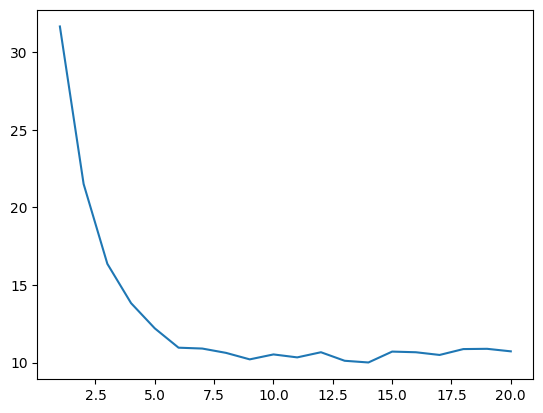

In [83]:
print(plt.plot(final_model.depth, final_model.rmse))

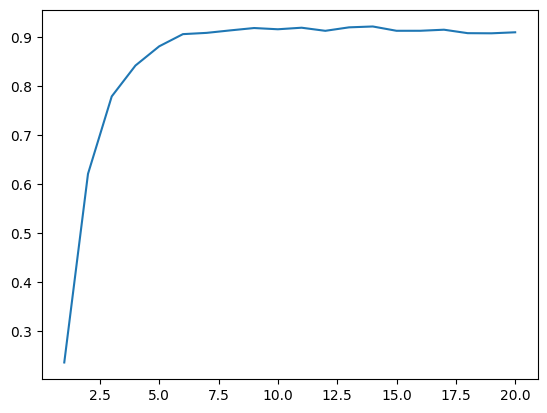

In [84]:
print(plt.plot(final_model.depth, final_model.r2))

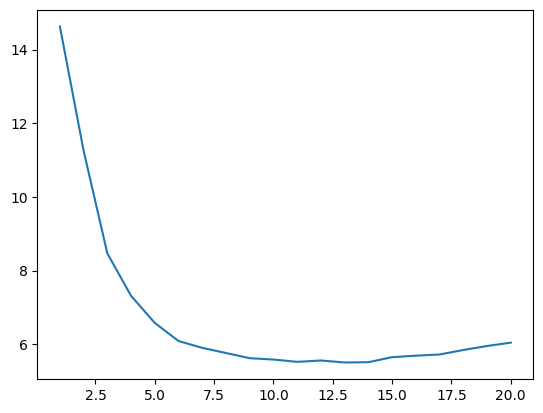

In [85]:
print(plt.plot(final_model.depth, final_model.mae))

In [86]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                                                    importance
Delay Carrier (Minutes)                               0.538903
Delay Late Aircraft Arrival (Minutes)                 0.399073
Delay National Aviation System (Minutes)              0.028411
Delay Weather (Minutes)                               0.014892
Difference Between Actual and Elapsed Travel Ti...    0.007383
Actual elapsed time (Minutes)                         0.005902
Taxi-Out time (Minutes)                               0.003348
Scheduled elapsed time (Minutes)                      0.001753
Delay Security (Minutes)                              0.000335


Axes(0.125,0.11;0.775x0.77)


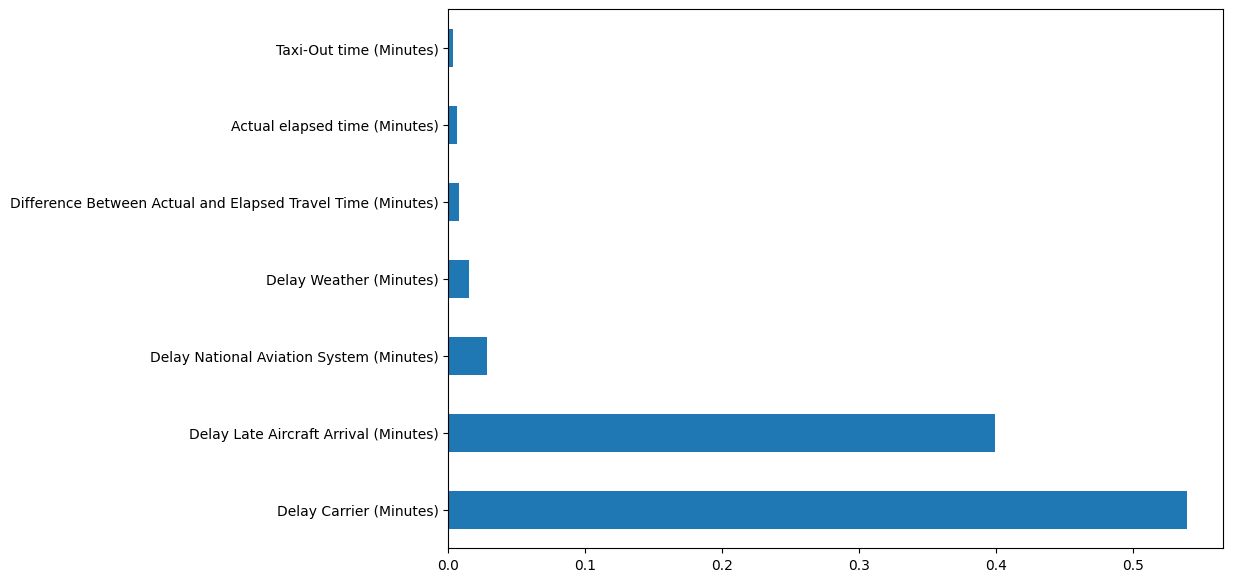

In [87]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [90]:
pred=best.predict(X_test)
print(pred[:14])

[ 0.3826087  -0.72077922 -0.72077922 71.         -0.73319756  1.32850242
  9.36363636 32.         -3.20718232 -0.73319756 -3.52941176 -0.72077922
 -0.72077922 -1.23065903]


In [91]:
print(metrics.r2_score(y_test, pred))

0.8766316701343959


In [92]:
#We want this number, RSME, to be less than .5  -
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) 

#MAE we want to be below .5 as well 
print(metrics.mean_absolute_error(y_test, pred)) #nice!

14.495246143839871
6.158390664442806


In [93]:
pred=best.predict(X_tune)
print(pred[:10])

#just using test data
print(best.score(X_tune, y_tune))

[-1.23065903  2.26582278 -0.44897959 -1.23065903  1.32850242  0.3826087
 -0.72077922 -0.72077922 -0.72077922 -0.72077922]
0.9403959880413117


In [95]:
# Get the probabilities of the predictions
reg.fit(X_test, y_test)
predictions = reg.predict(X)
dataframe_new_columns.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Difference Between Actual and Elapsed Travel Time (Minutes)'],
      dtype='object')

In [97]:
#flight code
top_predictions = [dataframe_new_columns['Carrier Code'] for dataframe_new_columns['Departure delay (Minutes)'] in predictions.argsort()]
top_predictions

[0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660    UA
 4661    UA
 4662    UA
 4663    UA
 Name: Carrier Code, Length: 4664, dtype: object,
 0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660    UA
 4661    UA
 4662    UA
 4663    UA
 Name: Carrier Code, Length: 4664, dtype: object,
 0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660    UA
 4661    UA
 4662    UA
 4663    UA
 Name: Carrier Code, Length: 4664, dtype: object,
 0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660    UA
 4661    UA
 4662    UA
 4663    UA
 Name: Carrier Code, Length: 4664, dtype: object,
 0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660    UA
 4661    UA
 4662    UA
 4663    UA
 Name: Carrier Code, Length: 4664, dtype: object,
 0       WN
 1       WN
 2       WN
 3       WN
 4       WN
         ..
 4659    UA
 4660 